In [1]:
# Adrian Marinovich
# Springboard - Data Science Career Track
# Inferential Statistics Exercise 3
# October 3, 2018

# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [193]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

import os
import string

from sklearn.svm import LinearSVC 
from sklearn.svm import SVC 

from sklearn.datasets import fetch_mldata
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
from scipy.stats import pearsonr

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

import warnings
warnings.filterwarnings('ignore')

In [83]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [84]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/home/adrian/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


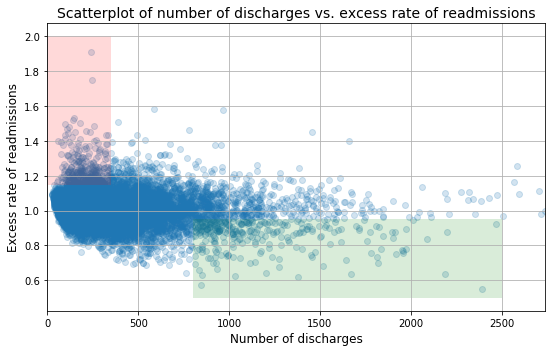

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Your turn

In [5]:
# Check data
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


In [6]:
clean_hospital_read_df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7.0,1.909500,32.800000,28.000000,879.000000


In [7]:
clean_hospital_read_df.head(82)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15625,FAIRVIEW DEVELOPMENTAL CENTER,50548,CA,READM-30-HF-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15642,WAGONER COMMUNITY HOSPITAL,370166,OK,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15648,ST LUKE'S HOSPITAL AT THE VINTAGE,670075,TX,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15652,SOUTH TEXAS SURGICAL HOSPITAL,670061,TX,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15396,GEORGE L MEE MEMORIAL HOSPITAL,50189,CA,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [8]:
clean_hospital_read_df.tail()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
8126,NAPLES COMMUNITY HOSPITAL,100018,FL,READM-30-HIP-KNEE-HRRP,2716,NaN,0.9804,5.2,5.3,141.0,07/01/2010,06/30/2013
6643,COMMUNITY MEDICAL CENTER,310041,NJ,READM-30-COPD-HRRP,2740,NaN,1.0003,22.7,22.7,623.0,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


Note that the first 81 (sorted) hospitals have missing data for the readmission variables, and the last 3 hospitals have very large discharge outliers that make plotting difficult, so we will exclude those from further analysis.

In [158]:
clean_82 = clean_hospital_read_df[81:-3]

A. Do you agree with the above analysis and recommendations? Why or why not?

The above analysis appears to be flawed in general, both because it relies on a correlation that is not clearly obvious in the plot, and because it makes an apples-to-oranges comparison between hospitals, in putting all hospitals of all sizes together without differentiation, as seen by the single 'blob' spread out over the above plot.

Below, to try to differentiate hospitals, the discharge number is normalized by dividing it by the readmission number. This ratio (D/R) is then plotted against the excess readmission ratio (ERR) to reveal two distinct groups (or 'blobs') of hospitals (see Figure 1, below). 

Perhaps the differentiation seen in Figure 1 is the result of hospitals with high D/R (right 'blob') seeing low-comorbidity patients, possibly including those with many patients using short-stay surgical and/or maternity centers within the hospital, splitting off into a separate group from those hospitals with low D/R (left 'blob') handling more complex high-comorbidity patients. 

Whatever the underlying explanation, Figure 1 appears to convey more useful information than the plot in the above analysis. Aside from splitting the hospitals into two groups, the groups show interesting features not previously appreciable in the above plot. First, both groups show unmistakable _local_ trends towards lower ERR (better performance) with higher D/R, which stands in contrast to the less obvious ERR trend with discharge number seen above. Furthermore, the right group with _overall_ higher D/R shows the _overall_ greatest spread of ERR, and in fact shows most of the _overall_ worst-performing hospitals. This indicates this particular group may be most worthy of special consideration in efforts to improve performance.

In addition, the above analysis sets an ERR of 1 as the analytical threshold, even though the overall mean ERR is 1.01. To better understand poor ERR performance (i.e., high ERR), it is more informative both to set a higher ERR threshold, and to include a measure of distance above this theshold, since the 'worst of the worst' performing hospitals may have disproportionate impacts on patient outcomes and healthcare costs. To ensure we select a tail of poor performers from both D/R groups, we set 1.2 as the new ERR threshold, and create a measure of poor performance using the amount, if any, that ERR exceeds 1.2 (max(0, ERR-1.2)). 

Finally, there are also two specific critiques to be made of the above analysis. First, they state that there is a 'significant correlation between hospital capacity (number of discharges) and readmission rates' without specifying the statistical significance test used to support this conclusion. As noted above, while the Pearson correlation coefficient is significant, it shows only a slight negative linear correlation (the coefficient is only -0.093, where -1 would be an exact linear relationship). Second, while in their statistics section they set <100 and >1000 discharges as thresholds to analyze hospitals (again without significance testing), in their conclusion they set discharges <300 as the threshold for their recommendation, without showing any statistical analysis to support that different threshold.

In conclusion, the above analysis appears to be both misleading and unfounded.

In [6]:
# Calculation of overall ERR mean, as noted above
np.mean(clean_82['Excess Readmission Ratio'])

1.007540917000168

In [23]:
# Calculation of Pearson correlation coefficient, as noted above
pearsonr(clean_82['Number of Discharges'].values, clean_82['Excess Readmission Ratio'].values)
# (Outputs Pearson’s correlation coefficient, and 2-tailed p-value)

(-0.09309554287590441, 1.5022756426464526e-23)

In [86]:
# Create D/R and ERR variables and make numpy array with them
x = clean_82['Number of Discharges'].values/clean_82['Number of Readmissions'].values
y = clean_82['Excess Readmission Ratio'].values
xy = np.column_stack((x,y))

In [87]:
xy.shape

(11494, 2)

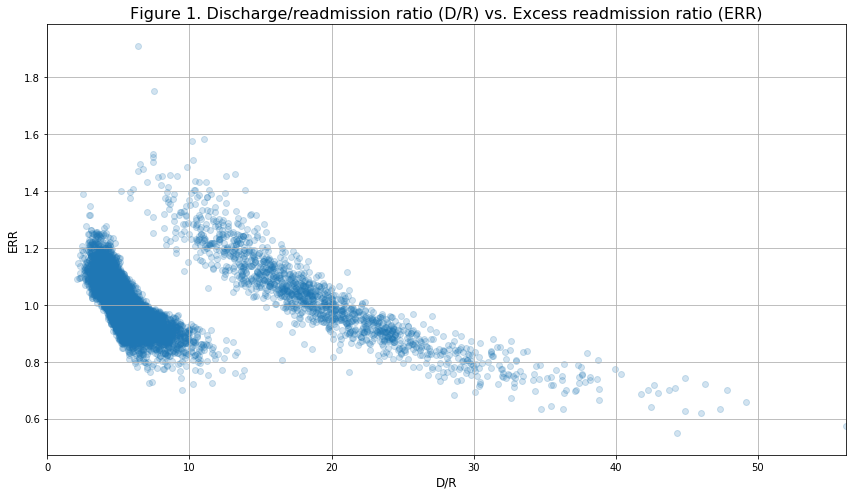

In [7]:
# Plot D/R vs. ERR
fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(x,y,alpha=0.2)

ax.set_xlim([0, max(x)])
ax.set_xlabel('D/R', fontsize=12)
ax.set_ylabel('ERR', fontsize=12)

ax.set_title('Figure 1. Discharge/readmission ratio (D/R) vs. Excess readmission ratio (ERR)', fontsize=16)

ax.grid(True)
fig.tight_layout()

In [15]:
#(Plot discharge number to  circle size?) - maybe to expand plot in answer to B5

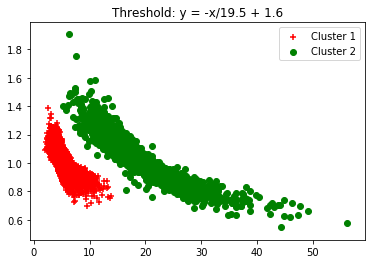

In [12]:
# Separate groups seen in Figure 1 using manually determined threshold line

for i in range(0, xy.shape[0]):
    if xy[i,1] <= -(1/19.5)*xy[i,0] + 1.6:
        c1 = plt.scatter(xy[i,0],xy[i,1],c='r',
                         marker='+')
    elif xy[i,1] > -(1/19.5)*xy[i,0] + 1.6:
        c2 = plt.scatter(xy[i,0],xy[i,1],c='g',
                         marker='o')
plt.legend([c1, 
            c2], 
           ['Cluster 1', 
            'Cluster 2'])
plt.title('Threshold: y = -x/19.5 + 1.6')
plt.show()

In [88]:
# The manual approach above works well, but a machine-
#  learning approach is desired.

# Separate groups seen in Figure 1 using DBSCAN

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

ss = StandardScaler()
xy_t = ss.fit_transform(xy)
#xy_t_small = xy_t[::10]
                
db = DBSCAN(eps=0.5, min_samples=10, algorithm='kd_tree')
labels = db.fit_predict(xy_t)

In [90]:
# View the DBSCAN output labels (-1 is noise)
set(labels)

{-1, 0, 1}

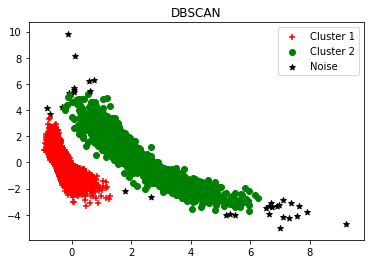

In [18]:
# Plot DBSCAN results
import matplotlib.pyplot as plt

for i in range(0, xy_t.shape[0]):
    if db.labels_[i] == 0:
        c1 = plt.scatter(xy_t[i,0],xy_t[i,1],c='r',
                         marker='+')
    elif db.labels_[i] == 1:
        c2 = plt.scatter(xy_t[i,0],xy_t[i,1],c='g',
                         marker='o')
    elif db.labels_[i] == -1:
        c4 = plt.scatter(xy_t[i,0],xy_t[i,1],c='k',
                         marker='*')
plt.legend([c1, 
            c2, 
            c4], 
           ['Cluster 1', 
            'Cluster 2', 
            'Noise'])
plt.title('DBSCAN')
plt.show()

In [91]:
# Run support vector machine (SVM) using 
#  non-noise labels output from DBSCAN above

# Create noise and non-noise datasets
xyl = np.column_stack((x,y,labels))
xyl_noise = xyl[np.where(xyl[:,2] == -1)]
xyl_nonoise = xyl[np.where(xyl[:,2] != -1)]

In [92]:
xyl_nonoise.shape

(11461, 3)

In [93]:
# Run support vector machine (SVM) using 
#  non-noise labels output from DBSCAN above

lin_clf = LinearSVC(random_state=42)
lin_clf.fit(xyl_nonoise[:,0:2], xyl_nonoise[:,2])

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

In [94]:
# SVM: Predict on the non-noise set, measure accuracy,
#  and plot
labels_pred = lin_clf.predict(xyl_nonoise[:,0:2])
accuracy_score(xyl_nonoise[:,2], labels_pred)

1.0

In [95]:
labels_pred.shape

(11461,)

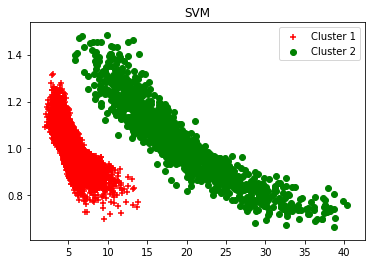

In [13]:
for i in range(0, xyl_nonoise.shape[0]):
    if labels_pred[i] == 0:
        c1 = plt.scatter(xyl_nonoise[i,0],xyl_nonoise[i,1],c='r',
                         marker='+')
    elif labels_pred[i] == 1:
        c2 = plt.scatter(xyl_nonoise[i,0],xyl_nonoise[i,1],c='g',
                         marker='o')
plt.legend([c1, 
            c2], 
           ['Cluster 1', 
            'Cluster 2'])
plt.title('SVM on non-noise dataset')
plt.show()

In [96]:
# SVM: predict on the full (noise & no-noise) set and plot 
full_labels_pred = lin_clf.predict(xyl[:,0:2])

In [97]:
set(full_labels_pred)

{0.0, 1.0}

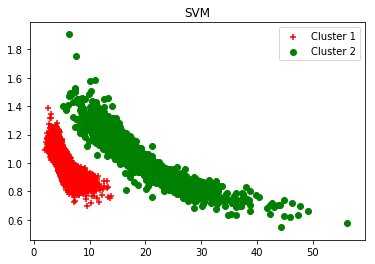

In [17]:
for i in range(0, xyl.shape[0]):
    if full_labels_pred[i] == 0:
        c1 = plt.scatter(xyl[i,0],xyl[i,1],c='r',
                         marker='+')
    elif full_labels_pred[i] == 1:
        c2 = plt.scatter(xyl[i,0],xyl[i,1],c='g',
                         marker='o')
plt.legend([c1, 
            c2], 
           ['Cluster 1', 
            'Cluster 2'])
plt.title('SVM on full dataset')
plt.show()

In [98]:
# This semi-supervised approach works as well as the 
#  manual approach, so now we'll take this SVM model 
#  and go into a decision tree 
#  (There is no need at this point to specify a more 
#   complex SVM kernel, or tuning SVM parameters)

# Add full labels to dataset
xylf = np.column_stack((xyl, full_labels_pred))

# Decision tree
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(xylf[:,0:2], xylf[:,3])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [99]:
# Tree: predict on the full set, measure accuracy, and plot
tree_labels_pred = tree_clf.predict(xylf[:,0:2])
accuracy_score(xylf[:,3], tree_labels_pred)

0.9939098660170523

In [100]:
set(tree_labels_pred)

{0.0, 1.0}

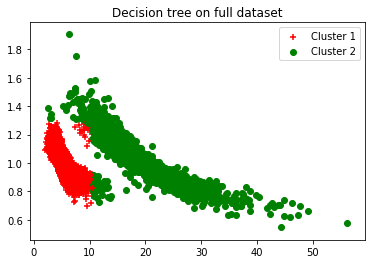

In [21]:
for i in range(0, xylf.shape[0]):
    if tree_labels_pred[i] == 0:
        c1 = plt.scatter(xylf[i,0],xylf[i,1],c='r',
                         marker='+')
    elif tree_labels_pred[i] == 1:
        c2 = plt.scatter(xylf[i,0],xylf[i,1],c='g',
                         marker='o')
plt.legend([c1, 
            c2], 
           ['Cluster 1', 
            'Cluster 2'])
plt.title('Decision tree on full dataset')
plt.show()

In [205]:
n_nodes = tree_clf.tree_.node_count
children_left = tree_clf.tree_.children_left
children_right = tree_clf.tree_.children_right
feature = tree_clf.tree_.feature
threshold = tree_clf.tree_.threshold

# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()

# First let's retrieve the decision path of each sample. The decision_path
# method allows to retrieve the node indicator functions. A non zero element of
# indicator matrix at the position (i, j) indicates that the sample i goes
# through the node j.

node_indicator = tree_clf.decision_path(xylf[:,0:2])

# Similarly, we can also have the leaves ids reached by each sample.

leave_id = tree_clf.apply(xylf[:,0:2])

# Now, it's possible to get the tests that were used to predict a sample or
# a group of samples. First, let's make it for the sample.

sample_id = 0
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

print('Rules used to predict sample %s: ' % sample_id)
for node_id in node_index:
    if leave_id[sample_id] == node_id:
        continue

    if (xylf[:,0:2][sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print("decision id node %s : (xylf[:,0:2][%s, %s] (= %s) %s %s)"
          % (node_id,
             sample_id,
             feature[node_id],
             xylf[:,0:2][sample_id, feature[node_id]],
             threshold_sign,
             threshold[node_id]))

# For a group of samples, we have the following common node.
sample_ids = [0, 1]
common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) ==
                len(sample_ids))

common_node_id = np.arange(n_nodes)[common_nodes]

print("\nThe following samples %s share the node %s in the tree"
      % (sample_ids, common_node_id))
print("It is %s %% of all nodes." % (100 * len(common_node_id) / n_nodes,))

The binary tree structure has 7 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 0] <= 10.435525894165039 else to node 4.
	node=1 test node: go to node 2 if X[:, 1] <= 1.281149983406067 else to node 3.
		node=2 leaf node.
		node=3 leaf node.
	node=4 test node: go to node 5 if X[:, 0] <= 11.837690353393555 else to node 6.
		node=5 leaf node.
		node=6 leaf node.

Rules used to predict sample 0: 
decision id node 0 : (xylf[:,0:2][0, 0] (= 2.0833333333333335) <= 10.435525894165039)
decision id node 1 : (xylf[:,0:2][0, 1] (= 1.0914) <= 1.281149983406067)

The following samples [0, 1] share the node [0 1 2] in the tree
It is 42.857142857142854 % of all nodes.


In [209]:
# not working completely, but does output working dot file
#  which can be plotted on www.webgraphiz.com
export_graphviz(tree_clf, out_file="mytree.dot", class_names=["Cluster 1", "Cluster 2"])
#with open("mytree.dot") as f:
#    dot_graph = f.read()
#graphviz.Source(dot_graph)

In [101]:
# Load in states data
#  (source: https://inkplant.com/code/us-state-mysql-table)

states_df = pd.read_csv('data/states_data.csv')

In [102]:
states_df.head()

,name,abv,country,is_state,is_lower48,slug,latitude,longitude,population,area
0,'Alabama','AL','US','y','y','alabama',32.806671,-86.791130,4779736,50744.00
1,'Alaska','AK','US','y','n','alaska',61.370716,-152.404419,710231,571951.25
2,'Arizona','AZ','US','y','y','arizona',33.729759,-111.431221,6392017,113634.57
3,'Arkansas','AR','US','y','y','arkansas',34.969704,-92.373123,2915918,52068.17
4,'California','CA','US','y','y','california',36.116203,-119.681564,37253956,155939.52


In [159]:
# Set up dummy variables for select Hospital Name words
#
# Bring lowercase Hospital Name string into new variable and clean it

clean_82["hospital name"] = [x.replace('-',' ') for x in clean_82["Hospital Name"].str.lower()]
clean_82["hospital name"] = [x.replace(' & ',' ') for x in clean_82["hospital name"]]
clean_82["hospital name"] = [x.replace(' and ',' ') for x in clean_82["hospital name"]]
clean_82["hospital name"] = [x.replace('the ',' ') for x in clean_82["hospital name"]]
clean_82["hospital name"] = [x.replace(' at ',' ') for x in clean_82["hospital name"]]
clean_82["hospital name"] = [x.replace(' of ',' ') for x in clean_82["hospital name"]]
clean_82["hospital name"] = [x.replace(',',' ') for x in clean_82["hospital name"]]
clean_82["hospital name"] = [x.replace('saint','st') for x in clean_82["hospital name"]]
clean_82["hospital name"] = [x.replace("'",'') for x in clean_82["hospital name"]]
clean_82["hospital name"] = [x.replace('marys','mary') for x in clean_82["hospital name"]]
clean_82["hospital name"] = [x.replace('lukes','luke') for x in clean_82["hospital name"]]
clean_82["hospital name"] = [x.replace('josephs','joseph') for x in clean_82["hospital name"]]
clean_82["hospital name"] = [x.replace('johns','john') for x in clean_82["hospital name"]]
clean_82["hospital name"] = [x.replace('vincents','vincent') for x in clean_82["hospital name"]]

In [169]:
# Count each word and obtain dummy variable (one-hot encoding)
#  for the 50 most frequent words, and view them
h_str_50 = pd.Series(' '.join(clean_82["hospital name"]).lower().split()).value_counts()[:50].index.values
h_str_50.shape

(50,)

In [161]:
clean_82.to_csv('data/clean_82.csv')

In [ ]:
# Break

In [170]:
clean_82=pd.read_csv('data/clean_82.csv')

In [171]:
clean_82.shape

(11494, 14)

In [172]:
# Create new variables for each of the top 50 words
for k in range(h_str_50.shape[0]):
    clean_82[h_str_50[k]] = clean_82.apply(lambda _: 0, axis=1)

In [173]:
clean_82.shape

(11494, 64)

In [174]:
# Specify new variables as dummy variables for presence
#  of its given word

line=0
for i in range(clean_82.shape[0]):
    line+=1
    col=13
    for j in range(h_str_50.shape[0]):
        col+=1
        if h_str_50[j] in clean_82.iloc[i,13]:
            clean_82.iloc[i,col] = 1
        print(line, end='\r')

In [175]:
# Check dummies created appropriately
pd.options.display.max_columns = 100
clean_82.head(50)

,Unnamed: 0,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date,hospital name,hospital,center,medical,regional,st,memorial,health,community,university,inc,general,mercy,valley,county,mary,joseph,system,baptist,north,west,methodist,healthcare,ctr,south,luke,john,texas,east,francis,providence,hospitals,campus,samaritan,good,heart,city,vincent,presbyterian,clinic,san,florida,lake,central,park,med,river,doctors,southern,franciscan,elizabeth
0,1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013,university md charles regional medical center,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013,atlantic general hospital,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013,mercy medical center inc,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013,kaiser foundation hospital santa clara,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013,palmerton hospital,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1602,TENNOVA HEALTHCARE-JEFFERSON MEMORIAL HOSPITAL,440056,TN,READM-30-AMI-HRRP,31,NaN,1.0992,24.2,22.1,13.0,07/01/2010,06/30/2013,tennova healthcare jefferson memorial hospital,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2048,FORT MADISON COMMUNITY HOSPITAL,160122,IA,READM-30-AMI-HRRP,33,NaN,1.0847,22.6,20.9,12.0,07/01/2010,06/30/2013,fort madison community hospital,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,2441,ISLAND HOSPITAL,500007,WA,READM-30-AMI-HRRP,34,NaN,1.0738,20.8,19.3,11.0,07/01/2010,06/30/2013,island hospital,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2512,NORTH CENTRAL BRONX HOSPITAL,330385,NY,READM-30-HF-HRRP,34,NaN,1.0720,23.3,21.8,12.0,07/01/2010,06/30/2013,north central bronx hospital,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,2825,KAISER FOUNDATION HOSPITAL FONTANA,50140,CA,READM-30-PN-HRRP,34,NaN,1.0651,20.7,19.4,11.0,07/01/2010,06/30/2013,kaiser foundation hospital fontana,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [177]:
clean_82.to_csv('data/clean_82dummy.csv')

In [160]:
# 
# do left joins

# 'Hospital Name' 'State'

state_centers = 

SyntaxError: invalid syntax (<ipython-input-160-2525cf8f5444>, line 6)

In [ ]:
# BOTTOM
###
##
#

In [ ]:
# map states spatially

In [ ]:
# SVC with an RBF kernel
svm_clf = SVC(decision_function_shape="ovo")
svm_clf.fit(xyl[:,0:2], xyl[:,2])

In [ ]:
# SVC w/RBF: Predict on the no noise set, measure accuracy,
#  and plot
rbf_pred = svm_clf.predict(xyl_nonoise[:,0:2])
accuracy_score(xyl_nonoise[:,2], rbf_pred)

In [ ]:
for i in range(0, xyl_nonoise.shape[0]):
    if rbf_pred[i] == 0:
        c1 = plt.scatter(xyl_nonoise[i,0],xyl_nonoise[i,1],c='r',
                         marker='+')
    elif rbf_pred[i] == 1:
        c2 = plt.scatter(xyl_nonoise[i,0],xyl_nonoise[i,1],c='g',
                         marker='o')
plt.legend([c1, 
            c2], 
           ['Cluster 1', 
            'Cluster 2'])
plt.title('SVM')
plt.show()

In [ ]:
# SVC with a poly kernel
svm_clf = SVC(decision_function_shape="ovo", kernel='poly')
svm_clf.fit(xyl[:,0:2], xyl[:,2])

In [ ]:
# SVC w/poly: Predict on the no noise set, measure accuracy,
#  and plot
rbf_pred = svm_clf.predict(xyl_nonoise[:,0:2])
accuracy_score(xyl_nonoise[:,2], rbf_pred)

In [ ]:
for i in range(0, xyl_nonoise.shape[0]):
    if rbf_pred[i] == 0:
        c1 = plt.scatter(xyl_nonoise[i,0],xyl_nonoise[i,1],c='r',
                         marker='+')
    elif rbf_pred[i] == 1:
        c2 = plt.scatter(xyl_nonoise[i,0],xyl_nonoise[i,1],c='g',
                         marker='o')
plt.legend([k1, 
            k2], 
           ['Cluster 1', 
            'Cluster 2'])
plt.title('SVM')
plt.show()

In [ ]:
# Run d/c correlation on each of the groups seen in Figure 1

In [ ]:
# mean ERR of high D/R and low D/R groups is () and () respectively

B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

1. Setup an appropriate hypothesis test.
2. Compute and report the observed significance value (or p-value).
3. Report statistical significance for α= .01.
4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
5. Look at the scatterplot above.
    - What are the advantages and disadvantages of using this plot to convey information?
    - Construct another plot that conveys the same information in a more direct manner.

